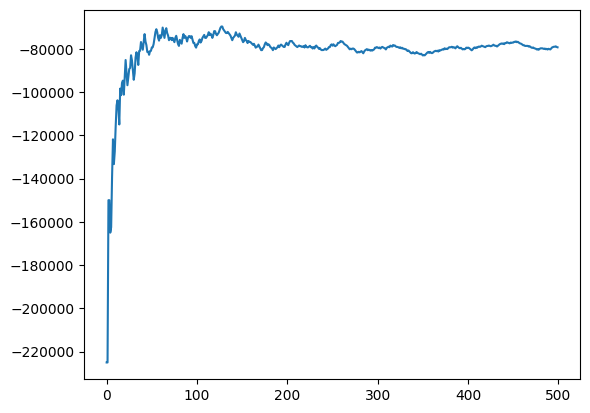

-78656.37949272597 6828.411107372487


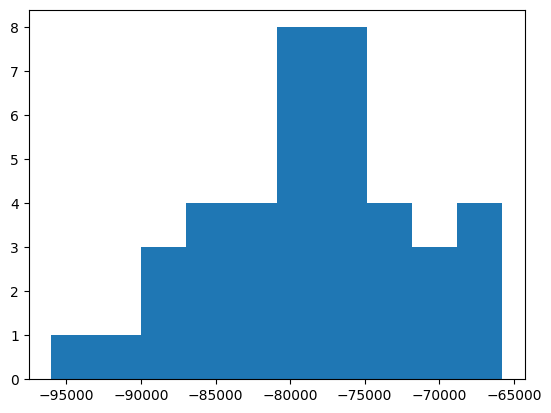

El intervalo de confianza es: (-80772.52601885636, -76540.23296659559)


In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np

def simulate_sales():
    # Función para simular las ventas y obtener un número aleatorio
    sales = 0
    u = random.random()
    # Asignar el número de ventas dependiendo del rango en el que caiga el número aleatorio
    if 0.0 <= u < 0.21999:
        sales = 100
    elif 0.22 <= u < 0.46999:
        sales = 200
    elif 0.47 <= u < 0.57999:
        sales = 300
    elif 0.58 <= u < 0.82999:
        sales = 400
    elif 0.83 <= u < 0.93999:
        sales = 500
    elif 0.94 <= u < 1.0:
        sales = 600
    return sales

def calculate_profit(order):
    # Función para calcular el beneficio a partir de un pedido dado
    income = 0
    returned = 0
    income_returned = 0
    sales = simulate_sales()
    cost = 0
    profit = 0

    if order > sales:
        # Calcular ingreso y devolución si el pedido es mayor que las ventas simuladas
        income = sales * 1000
        returned = order - sales
        income_returned = returned * 250
    else:
        # Calcular ingreso y devolución si el pedido es menor o igual que las ventas simuladas
        income = order * 1000
        returned = 0
        income_returned = 0

    cost = 750 * order
    # Calcular el beneficio restando el costo de producción al ingreso total
    profit = income + income_returned - cost
    return profit

def simulate(n):
    # Función para simular n veces y obtener una lista de beneficios promedio acumulados
    results = []
    total_profit = 0

    for i in range(n):
        # Calcular el beneficio acumulado para cada simulación
        total_profit += calculate_profit(600)
        results.append(total_profit / (i + 1))

    return results

X = simulate(500)
plt.plot(X)
plt.show()

def model(n):
    # Función para realizar el modelo n veces y obtener una lista de beneficios promedio
    results = []
    for i in range(n):
        s = simulate(500)
        results.append(np.mean(s))
    return results

Y = model(40)
print(np.mean(Y), np.std(Y))

plt.hist(Y)
plt.show()

mean_Y = np.mean(Y)
var_Y = np.var(Y)
std_err = np.sqrt(var_Y) / np.sqrt(40)
confidence_interval = (mean_Y - 1.96 * std_err, mean_Y + 1.96 * std_err)
print("El intervalo de confianza es:", confidence_interval)